In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load csv
kaggleDataset = pd.read_csv("../../Datasets/Kaggle/COVID19_open_line_list_clean.csv")

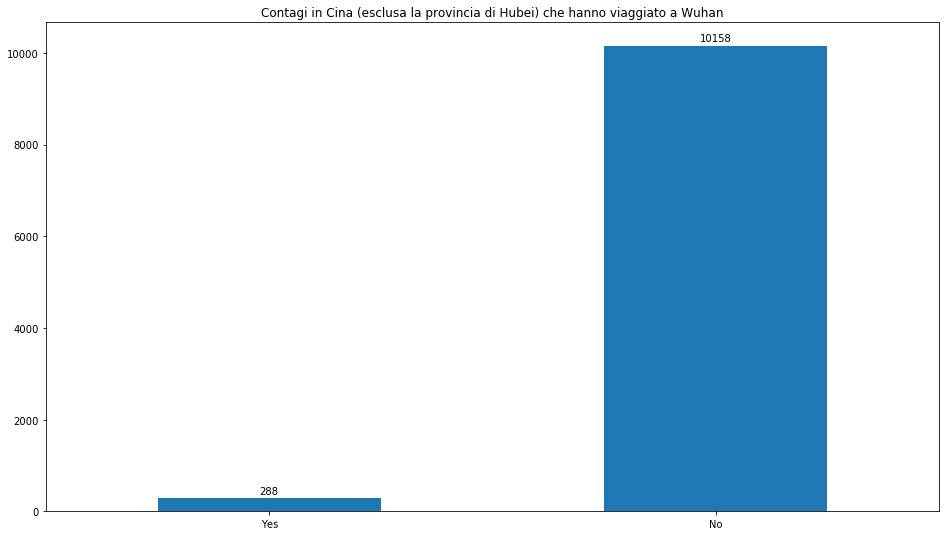

In [172]:
kaggleDatasetChina = kaggleDataset[kaggleDataset["country"] == "China"]
travelY = kaggleDatasetChina[kaggleDatasetChina["travel_in_Wuhan"] == True]["travel_in_Wuhan"].count()
travelN = kaggleDatasetChina[kaggleDatasetChina["travel_in_Wuhan"] == False]["travel_in_Wuhan"].count()

#Set X axis label
label = ["Yes", "No"]
travel = pd.DataFrame([travelY, travelN])

#Create plot
ax = travel.plot.bar(title="Contagi in Cina (esclusa la provincia di Hubei) che hanno viaggiato a Wuhan", figsize=(16,9), rot=1)
ax.get_legend().remove()

#add x labels
plt.xticks(np.arange(2), label)

#In order to have same vertical shifts between all bars top value
not_so_beautifull_vertical_shift = int(max(travelY, travelN)) * 0.01

#write column values over them
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()+not_so_beautifull_vertical_shift), ha='center')    

#Show plot
plt.show()

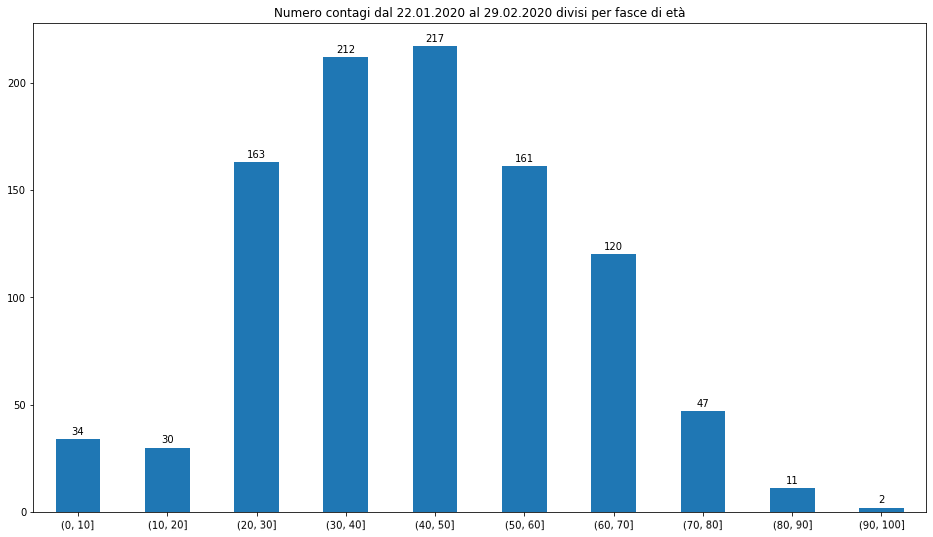

In [173]:
#get age column
kaggleEta =kaggleDataset[['age']].copy()

#create categorical column
kaggleEta['age_cat'] = pd.cut(kaggleEta['age'],list(range(0,110,10))) 

#count istances for different cat
kaggleEta = kaggleEta.groupby(['age_cat'])['age'].count()

#convert to dataframe
kaggleEta = pd.DataFrame(kaggleEta)
kaggleEta.reset_index(inplace=True)

#get x label
label = kaggleEta['age_cat'].tolist()

#get period of time
maxDate = kaggleDataset['date_confirmation'].tolist()[-1]
minDate = kaggleDataset['date_confirmation'].tolist()[0]

#Create plot
ax = kaggleEta.plot.bar(title="Numero contagi dal "+str(minDate)+" al "+str(maxDate)+" divisi per fasce di età", figsize=(16,9), rot=1)
ax.get_legend().remove()

#add x labels
plt.xticks(np.arange(len(label)), label)

#In order to have same vertical shifts between all bars top value
not_so_beautifull_vertical_shift = int(max(kaggleEta['age'].tolist())) * 0.01

#write column values over them
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()+not_so_beautifull_vertical_shift), ha='center')    

#Show plot
plt.show()

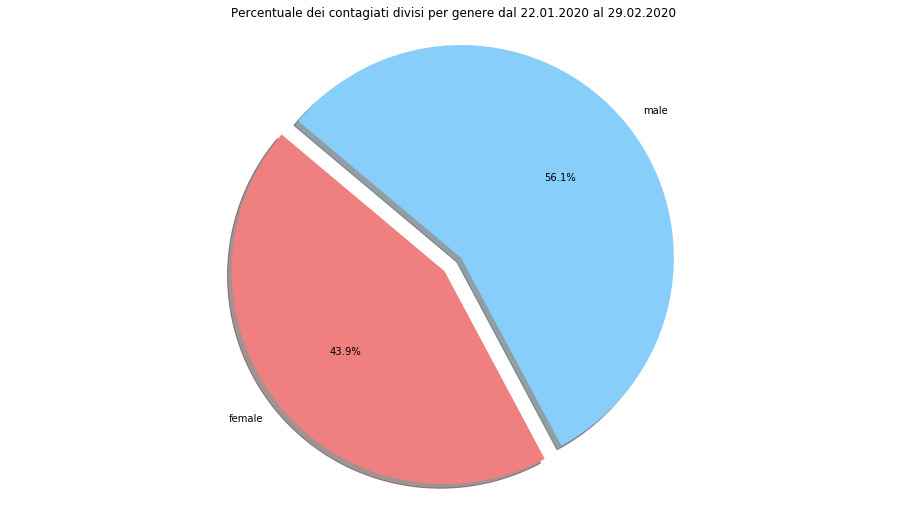

In [174]:
#load column sex
kaggleSex = kaggleDataset[['sex']]
#lowercase all strings
kaggleSex = kaggleSex['sex'].apply(lambda x: str.lower(str(x)))
kaggleSex = pd.DataFrame(kaggleSex)
#remove nan
kaggleSex = kaggleSex[kaggleSex['sex'] != 'nan']
#count how many rows per sex
kaggleSex = kaggleSex.groupby(['sex'])['sex'].count()
kaggleSex = pd.DataFrame(kaggleSex)
#rename column sex to count
kaggleSex.rename(columns={'sex':'count'},inplace=True)
#reset index to get back sex column
kaggleSex.reset_index(inplace=True)

#get period of time
maxDate = kaggleDataset['date_confirmation'].tolist()[-1]
minDate = kaggleDataset['date_confirmation'].tolist()[0]

# Data to plot
label = kaggleSex['sex'].tolist()
sizes = kaggleSex['count'].tolist()
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
fig,ax = plt.subplots(figsize=(16,9))
ax.pie(sizes, explode=explode, labels=label, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

ax.set_title("Percentuale dei contagiati divisi per genere dal "+str(minDate)+" al "+str(maxDate))
plt.axis('equal')

plt.show()